In [1]:

import src.grimoire as Grimoire
import src.decks as Decks
from src.by import By

kodama = "Kodama of the West Tree"
# mazzi = Decks.fetch(By.COMMANDER, kodama, n_thread=1)

# grim = Grimoire.load("OMNI") if Grimoire.load("OMNI",False) is not None else Grimoire().make_omni()
grim = Grimoire.fetch(By.COMMANDER, kodama)

In [2]:
commander = "Jodah, the Unifier"
# grim = Grimoire.Grimoire(omnicomprehensive=True)
# Decks.fetch(By.COMMANDER, commander)
grims = Grimoire.fetch(By.COMMANDER,commander,check_if_playable=True)


Carico le carte dal grimorio di Jodah, the Unifier


In [3]:
for deckid, grim in grims.split().items():
    grim = grim
    break

In [4]:
from src.card import Filters
# Crea la matrice di correlazione
df = grim.dataframe( 
    positive_filters=[
        Filters.isLegalInCommander,
        Filters.isCreature
    ], 
    negative_filters=[
        Filters.isToken
    ],
    additional_data={
        # "is_creature": lambda card: int(Type.Creature.name in card.types),
        # "#keywords" : lambda card: len(card.keywords),
        "#words" : lambda card: card.text.count(' ')+1,
        # "is_black": lambda card: int(card.color_identity['B']),
        # "is_white": lambda card: int(card.color_identity['W']),
        # "is_colorless": lambda card: int(all(not v for v in card.color_identity.values())),
        "is_legendary": lambda card: int("Legendary" in card.super_types),
        "#act_abilities": lambda card: card.count_active_abilities(),
        "#trigg_abilities": lambda card: card.count_trigger_abilities(),
        "mana_production": lambda card: card.abs_mana_production()
    })

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # type: ignore

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = df.copy()
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
df_scaled[numeric_cols] =  scaler.fit_transform(df[numeric_cols])
correlation_matrix = df_scaled.corr()

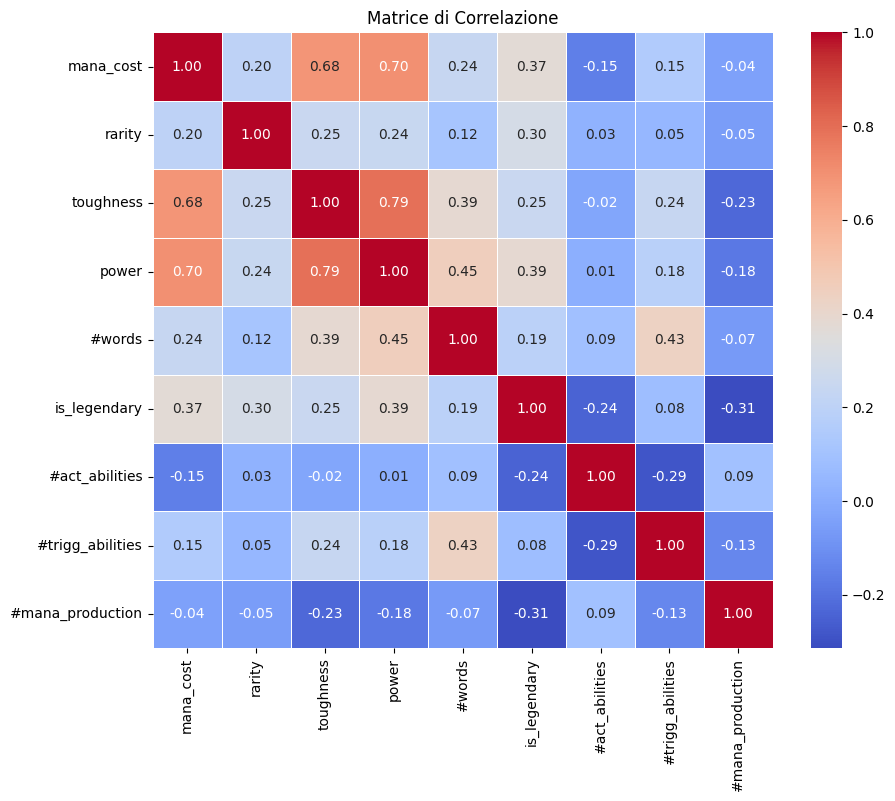

In [6]:
import numpy as np # type: ignore
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=np.round(correlation_matrix, 2), cmap='coolwarm', 
            linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.title('Matrice di Correlazione')
plt.show()


In [7]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np


# Funzione per aggiornare la heatmap
def update_heatmap(limit):
    # Crea una maschera booleana per nascondere le annotazioni non significative
    mask_annot = (correlation_matrix < -limit) | (correlation_matrix > limit)

    # Crea una matrice di annotazioni, sostituendo i valori non significativi con NaN
    annot = np.where(mask_annot, np.round(correlation_matrix, 2), np.nan)

    # Stampa la heatmap senza annotazioni per le celle non significative
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, mask=np.isnan(annot))
    plt.title(f'Heatmap with Limit: {limit}')
    plt.show()

# Crea un widget per limit
limit_slider = widgets.FloatSlider(value=0.15, min=0.00, max=0.23, step=0.001, description='Limit:')


# # Mostra la heatmap iniziale
# update_heatmap(limit_slider.value)

# Collega il widget alla funzione di aggiornamento
widgets.interactive(update_heatmap, limit=limit_slider)

interactive(children=(FloatSlider(value=0.15, description='Limit:', max=0.23, step=0.001), Output()), _dom_cla…

In [8]:
def percentuale(count):
    return round(count/len(grim)*100,2)

import imageio.v2 as imageio
# Definisci i limiti per la GIF
limits = np.arange(0, 0.24, 0.01)

# Lista per salvare i frame
frames = []

# Genera i frame
for limit in limits:
    plt.figure(figsize=(10, 8))
    
    # Crea una maschera booleana per nascondere le annotazioni non significative
    mask_annot = (correlation_matrix < -limit) | (correlation_matrix > limit)

    # Crea una matrice di annotazioni
    annot = np.where(mask_annot, np.round(correlation_matrix, 2), np.nan)

    # Stampa la heatmap
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, mask=np.isnan(annot))
    plt.title(f'Heatmap with Limit: {limit:.2f}')
    
    # Salva il frame come immagine
    plt.savefig(f'frame_{limit:.2f}.png')
    plt.close()

    # Aggiungi il frame alla lista
    frames.append(imageio.imread(f'frame_{limit:.2f}.png'))

# Crea una GIF animata
imageio.mimsave('heatmap_animation.gif', frames, duration=4)

# Rimuovi le immagini temporanee (opzionale)
import os
for limit in limits:
    os.remove(f'frame_{limit:.2f}.png')

print("GIF animata creata: heatmap_animation.gif")

/tmp/ipykernel_13407/3407615285.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'frame_{limit:.2f}.png'))
/tmp/ipykernel_13407/3407615285.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(f'frame_{limit:.2f}.png'))
/tmp/ipykernel_13407/3407615285.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imag

Su un totale di 1030 carte:
 7.77%: 80 sono Land
10.29%: 106 sono Instant
41.94%: 432 sono Creature
15.83%: 163 sono Enchantment
11.55%: 119 sono Sorcery
14.76%: 152 sono Artifact
 1.36%: 14 sono Planeswalker
 0.19%: 2 sono Kindred
 0.19%: 2 sono Battle
 1.17%: 12 sono Token
